# Perceptron Algorithm 

In this notebook, we implement the Perceptron algorithm, one of the earliest and simplest binary classifiers in machine learning. 

The Perceptron is a supervised learning algorithm used for binary classification tasks. 
It learns a linear decision boundary that separates two classes in the feature space.

We will:
- Create a simple 2D dataset,
- Visualize the dataset,
- Build the Perceptron model from scratch,
- Train the model,
- Plot the decision boundary,
- Test the model on new data points,
- Analyze the results.

This project is part of the final assignment for INDE 577: Data Science and Machine Learning.


In [61]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


In [63]:
# Create a simple binary classification dataset
X = np.array([
    [2, 3],
    [4, 5],
    [5, 8],
    [1, 0.6],
    [9, 11],
    [8, 8],
    [10, 2],
    [9, 3]
])

y = np.array([0, 0, 0, 0, 1, 1, 1, 1])  # Labels (classes)


### Visualize the Dataset
We create a simple 2D binary classification dataset and plot it with different colors for different classes.


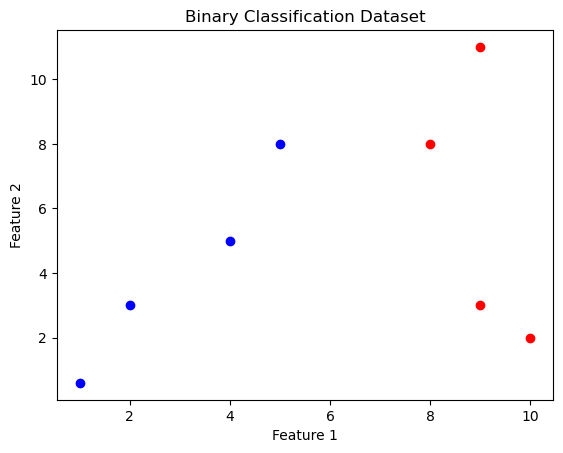

In [66]:
# Plot the dataset
for i in range(len(y)):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], color='blue')
    else:
        plt.scatter(X[i][0], X[i][1], color='red')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary Classification Dataset')
plt.show()


## Analysis of the Dataset

The scatter plot shows two clearly separated classes:

- Blue points (Class 0) are mostly located at lower feature values.
- Red points (Class 1) are generally at higher feature values.

This visual separation suggests that the dataset is linearly separable,  
which means that a simple linear classifier like the Perceptron should perform well on this data.


### Build the Perceptron Model
We implement a Perceptron class from scratch with `fit` and `predict` methods.


In [70]:
# Build the Perceptron model
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])  # Make sure labels are 0 and 1

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                update = self.lr * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)


In [72]:
# Initialize and train the Perceptron
p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X, y)


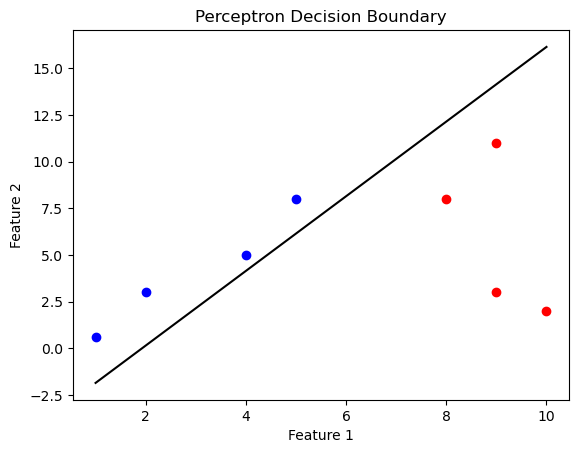

In [74]:
# Plot decision boundary
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for idx, sample in enumerate(X):
    if y[idx] == 0:
        ax.scatter(sample[0], sample[1], color='blue')
    else:
        ax.scatter(sample[0], sample[1], color='red')

# Decision boundary
x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Perceptron Decision Boundary')
plt.show()


## Analysis of the Decision Boundary

The Perceptron model successfully separated the two classes with a linear boundary. 
All red and blue points appear to be correctly separated, indicating that the dataset is linearly separable.


In [77]:
# Predict a new data point
new_sample = np.array([[4, 4]])
prediction = p.predict(new_sample)
print(f"Prediction for the point (4,4): Class {prediction[0]}")


Prediction for the point (4,4): Class 1


## Analysis of New Sample Prediction

We tested the model with a new data point at coordinates (4,4).  
The Perceptron model predicted this point as belonging to **Class 1**.

Considering the decision boundary and the data distribution,  
this prediction makes sense because the point (4,4) lies relatively closer to the red points (Class 1) compared to the blue points (Class 0).

Thus, the model behaves as expected on unseen data.
